# Selected SciPy Examples

By the end of this lesson, you will be aware of some of the tools SciPy has available for solving problems related to integration, nonlinear equations, optimization, and differential equations.

## SciPy modules


  - Special functions (`scipy.special`)
  - Integration (`scipy.integrate`)
  - Optimization (`scipy.optimize`)
  - Interpolation (`scipy.interpolate`)
  - Fourier Transforms (`scipy.fftpack`)
  - Signal Processing (`scipy.signal`)
  - Linear Algebra (`scipy.linalg`)
  - Statistics (`scipy.stats`)
  - Multidimensional image processing (`scipy.ndimage`)
  - File IO (`scipy.io`)

## `scipy.special`

In [9]:
import scipy as sp
import scipy.special
import matplotlib.pyplot as plt

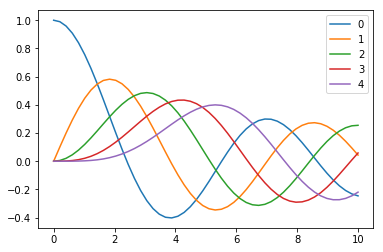

In [11]:
x = sp.linspace(0, 10)
for i in range(5):    
    plt.plot(x, scipy.special.jv(i, x))
plt.legend(range(5))

## `scipy.integrate`

Compute $\int^1_0 x^2 dx$:

In [12]:
from scipy.integrate import quad
quad(lambda x: x**2, 0, 1)

(0.33333333333333337, 3.700743415417189e-15)

Solve $y' = e^{-t} - y(t)$ for $y(0) = 1$ and evaluate over $t \in [0, 10]$.

In [17]:
from scipy.integrate import odeint

def rhs(y, t):
    """Returns the right-hand side of the IVP."""
    return sp.exp(-t) - y

In [18]:
times = sp.linspace(0, 10)
y = odeint(rhs, y0=1, t=times)[:, 0]

Text(0, 0.5, 'y(t)')

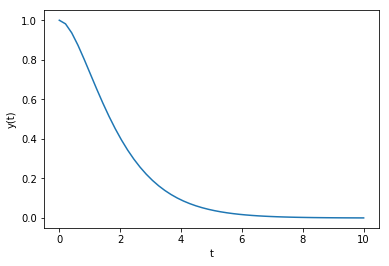

In [20]:
plt.plot(times, y)
plt.xlabel('t'); plt.ylabel('y(t)')

## `scipy.ndimage`

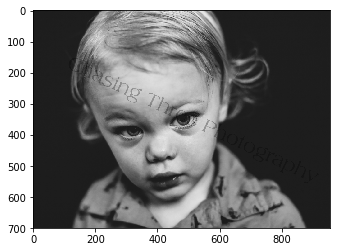

In [25]:
f = plt.imread('linus.png')
plt.imshow(f)

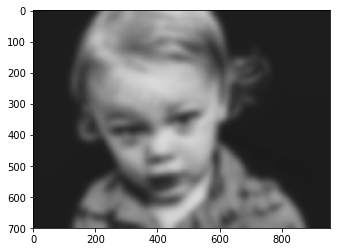

In [28]:
import scipy.ndimage
plt.imshow(scipy.ndimage.gaussian_filter(f, sigma=10)) # gaussian average of pixels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


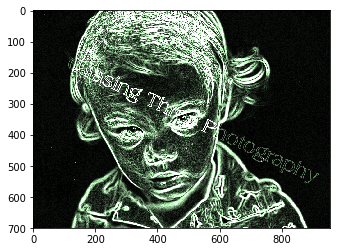

In [35]:
sx = scipy.ndimage.sobel(f, axis = 0, mode = 'constant') # basically, differentiates
sy = scipy.ndimage.sobel(f, axis = 1, mode = 'constant') # pixels along one axis
sob = sp.hypot(sx, sy) # sqrt(sx^2+sy^2)
plt.imshow(sob)

## `scipy.optimize`

Solve the system

$$
\begin{split}
   x - y &= 4 \\ 
   x^2+y &= -3
\end{split}
$$

In [37]:
from scipy.optimize import fsolve

def f(z):
    x, y = z # unpack z
    return [x-y-4, x**2+y+3]

z0 = [1/2, -3]
fsolve(f, z0)

array([ 0.61803399, -3.38196601])

Consider this [two-bar truss problem](http://apmonitor.com/me575/index.php/Main/TwoBarTruss).

Our goal is to find the height and diameter that minimize the weight while meeting the constraints.

In [49]:
from scipy.optimize import minimize

In [50]:
def mass(rho, d, t, B, H):
    return rho*2*sp.pi*d*t*sp.sqrt((B/2)**2+H**2)

def stress(d, t, B, H, P):
    return P*sp.sqrt((B/2)**2+H**2) / (2*t*sp.pi*d*H)

def buckling_stress(d, t, B, H, E):
    return (sp.pi**2*E*(d**2+t**2))/(8*((B/2)**2+H**2))

def deflection(d, t, B, H, P):
    return (P*((B/2)**2+H**2)**(3/2))/(2*t*sp.pi*d*H**2*E)

In [51]:
# Initial or fixed values
H = 30.0
d = 3.0
t = 0.15
B = 60.0
E = 30000.0
rho = 0.3
P = 66.0

In [52]:
objective = lambda x: mass(rho, x[0], t, B, x[1])

In [53]:
constraint1 = lambda x: 100.0 - stress(x[0], t, B, x[1], P)
constraint2 = lambda x: buckling_stress(x[0], t, B, x[1], E) - \
                        stress(x[0], t, B, x[1], P)
constraint3 = lambda x: 0.25 - deflection(x[0], t, B, x[1], P)
               
constraints = [{'type': 'ineq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2},
               {'type': 'ineq', 'fun': constraint3}]

In [54]:
minimize(objective, x0=[d, H], constraints=constraints)

     fun: 15.868275782823414
     jac: array([9.38632584, 0.20467615])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([ 1.69057372, 14.21489262])